<a href="https://colab.research.google.com/github/kaybrian/Chatbot_ML_T1/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libs
in the first steep of the project, we are going to import all the needed libraries for the project


In [1]:
import numpy as np
import codecs
import tensorflow as tf
import pandas as pd
import ast
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

## import the data
First import the data to be used in the projct

In [4]:
dialogs = pd.read_csv('/content/dialogs_expanded.csv')

In [5]:
print(dialogs.shape)
dialogs.head()

(139409, 7)


,Unnamed: 0,question,answer,question_as_int,answer_as_int,question_len,answer_len
0,1,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,"[54, 67, 74, 74, 12, 1, 40, 1, 82, 70, 77, 83,...","[45, 77, 82, 1, 82, 70, 67, 1, 70, 63, 65, 73,...",71,55
1,2,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...,"[45, 77, 82, 1, 82, 70, 67, 1, 70, 63, 65, 73,...","[46, 73, 63, 87, 14, 14, 14, 1, 82, 70, 67, 76...",55,73
2,3,You're asking me out. That's so cute. What's ...,Forget it.,"[56, 77, 83, 8, 80, 67, 1, 63, 81, 73, 71, 76,...","[37, 77, 80, 69, 67, 82, 1, 71, 82, 14]",62,10
3,4,"No, no, it's my fault -- we didn't have a prop...",Cameron.,"[45, 77, 12, 1, 76, 77, 12, 1, 71, 82, 8, 81, ...","[34, 63, 75, 67, 80, 77, 76, 14]",65,8
4,9,"Gosh, if only we could find Kat a boyfriend...",Let me see what I can do.,"[38, 77, 81, 70, 12, 1, 71, 68, 1, 77, 76, 74,...","[43, 67, 82, 1, 75, 67, 1, 81, 67, 67, 1, 85, ...",46,25


In [6]:
# understand the data given
dialogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139409 entries, 0 to 139408
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       139409 non-null  int64 
 1   question         139409 non-null  object
 2   answer           139409 non-null  object
 3   question_as_int  139409 non-null  object
 4   answer_as_int    139409 non-null  object
 5   question_len     139409 non-null  int64 
 6   answer_len       139409 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 7.4+ MB


In [7]:
dialogs.describe()

,Unnamed: 0,question_len,answer_len
count,139409.000000,139409.000000,139409.000000
mean,110807.533151,38.200683,38.436177
std,63958.234614,23.293145,23.685213
min,1.000000,8.000000,8.000000
25%,55253.000000,20.000000,19.000000
50%,111023.000000,32.000000,32.000000
75%,166238.000000,53.000000,54.000000
max,221612.000000,100.000000,100.000000


### Cheking if there is null or not



In [8]:
dialogs.isnull().sum()

,0
Unnamed: 0,0
question,0
answer,0
question_as_int,0
answer_as_int,0
question_len,0
answer_len,0


### Extract useful data
In this step, we need to get only useful information for the project.

Main concern is (question, answer) pair columns only

In [9]:
data = dialogs[['question', 'answer']]
data.head()

,question,answer
0,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....
1,Not the hacking and gagging and spitting part....,Okay... then how 'bout we try out some French ...
2,You're asking me out. That's so cute. What's ...,Forget it.
3,"No, no, it's my fault -- we didn't have a prop...",Cameron.
4,"Gosh, if only we could find Kat a boyfriend...",Let me see what I can do.


### extract useful words now


In [10]:
total_strings = data['question'].values.tolist() + data['answer'].values.tolist()
all_strings = " ".join(total_strings)
pattern = re.compile(r"[\w]*'[\w]*")
matchings = re.findall(pattern, all_strings)

In [11]:
# show the extracteed words
set(matchings)


{"She's",
 "when's",
 "blamin'",
 "they'll",
 "'this",
 "speakin'",
 "Lippman's",
 "'gain",
 "I'D",
 "Hemingway's",
 "'34",
 "6's",
 "Erica's",
 "Kirsty's",
 "hair'll",
 "beginnin'",
 "Get'chu",
 "Bensinger's",
 "Caiman's",
 "Where're",
 "puttin'",
 "heck're",
 "There'd",
 "photographer's",
 "thin'",
 "Mookie's",
 "morir'",
 "chainin'",
 "anything's",
 "Kuato's",
 "President's",
 "Danny's",
 "Gonna'",
 "Belgium's",
 "Thompson's",
 "y'ready",
 "rampagin'",
 "deceased's",
 "We'd",
 "'Cept",
 "'Las",
 "juice'll",
 "Sally's",
 "'Times",
 "Elmer's",
 "bed's",
 "'sit",
 "PRESIDENT'S",
 "dumber'n",
 "Wynant's",
 "filter's",
 "'been",
 "These'll",
 "Sweeney's",
 "Ruben's",
 "'Ere",
 "m'dear",
 "libido's",
 "never've",
 "life'",
 "Waldman's",
 "movie's",
 "Navigator's",
 "'Daddy",
 "firm'll",
 "robbin'",
 "cryin'",
 "ma'",
 "Wha'cha",
 "Malone's",
 "matter's",
 "Annabelle's",
 "Elton's",
 "Te's",
 "Fire's",
 "Rammellzee's",
 "nobody's",
 "you'n",
 "Thaaaat's",
 "'claustrophobic",
 "girlfriend's

### Data Preprocessing
Removing special characters and doing decontraction



In [12]:
def decontractions(phrase):
    #specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’s", " is", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase

def preprocess(text):
    text = text.lower()
    text = decontractions(text)
    text = re.sub('[^A-Za-z0-9 ]+', '', text)
    return text


data['question'] = data['question'].apply(preprocess)
data['answer'] = data['answer'].apply(preprocess)
data.head()

,question,answer
0,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...
1,not the hacking and gagging and spitting part ...,okay then how bout we try out some french cuis...
2,you are asking me out that is so cute what is...,forget it
3,no no it is my fault we did not have a proper...,cameron
4,gosh if only we could find kat a boyfriend,let me see what i can do


In [13]:
q_lengths = data['question'].str.split().apply(len)
a_lengths = data['answer'].str.split().apply(len)

In [14]:
from tqdm import tqdm
all_ques = " ".join(data['question'].values)
all_ans = " ".join(data['answer'].values)
word_cnt_a = {}
for i in tqdm(all_ans.split()): word_cnt_a[i] = word_cnt_a.get(i, 0) + 1
word_cnt_q = {}
for i in tqdm(all_ques.split()): word_cnt_q[i] = word_cnt_q.get(i, 0) + 1

100%|██████████| 1087736/1087736 [00:01<00:00, 1054066.86it/s]


In [15]:
word_ordered_a = sorted(word_cnt_a, key=lambda x: word_cnt_a[x], reverse=True)
top_20_a = word_ordered_a[:20]
cnts_20_a = [word_cnt_a[i] for i in top_20_a]

word_ordered_q = sorted(word_cnt_q, key=lambda x: word_cnt_q[x], reverse=True)
top_20_q = word_ordered_q[:20]
cnts_20_q = [word_cnt_q[i] for i in top_20_q]

In [16]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
def plot(top_words, counts):
    fig, ax = plt.subplots()

    # Save the chart so we can loop through the bars below.
    bars = ax.bar(
        x=np.arange(len(top_words)),
        height=counts,
        tick_label=top_words
    )

    # Axis formatting.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    # Add text annotations to the top of the bars.
    bar_color = bars[0].get_facecolor()
    for bar in bars:
      ax.text(
          bar.get_x() + bar.get_width() / 2,
          bar.get_height() + 0.3,
          round(bar.get_height(), 1),
          horizontalalignment='center',
          color=bar_color,
          weight='bold'
      )

    # Add labels and a title. Note the use of `labelpad` and `pad` to add some
    # extra space between the text and the tick labels.
    ax.set_xlabel('Word', labelpad=15, color='#333333')
    ax.set_ylabel('Count', labelpad=15, color='#333333')
    ax.set_title("Most usual words in reply/answers", pad=15, color='#333333',
                 weight='bold')

    fig.tight_layout()

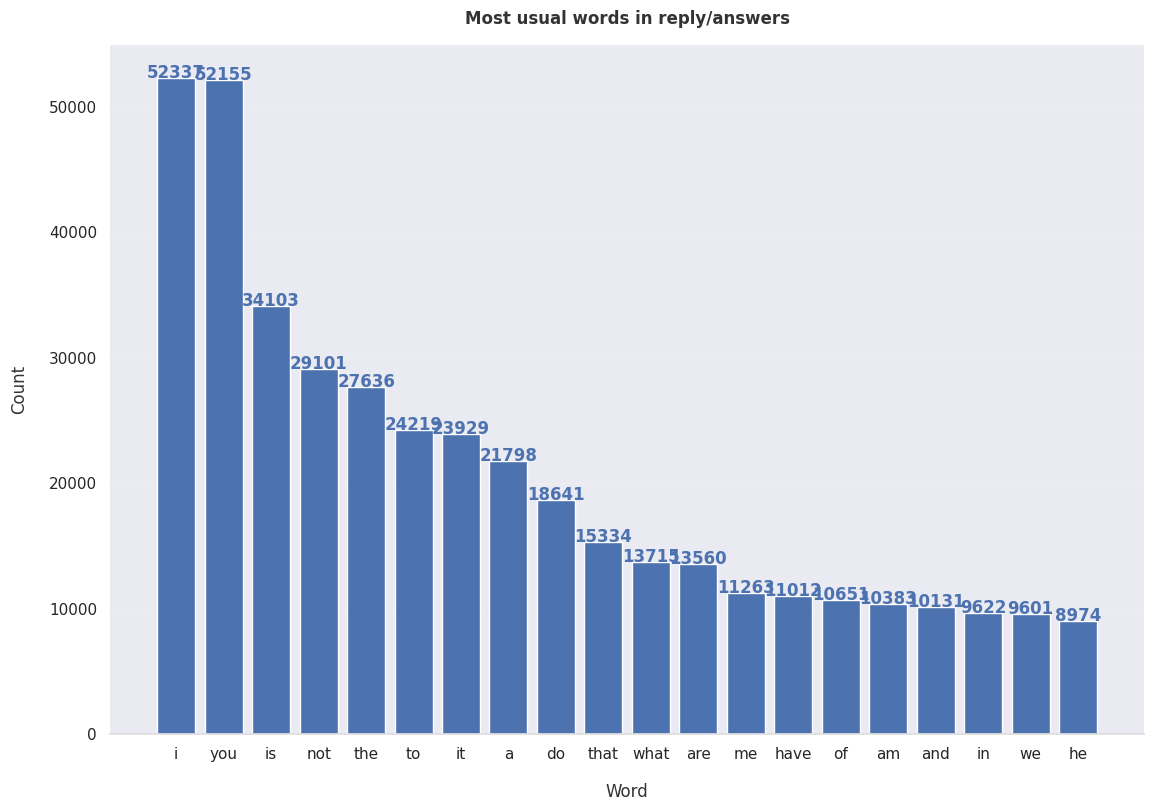

In [17]:
plot(top_20_a, cnts_20_a)


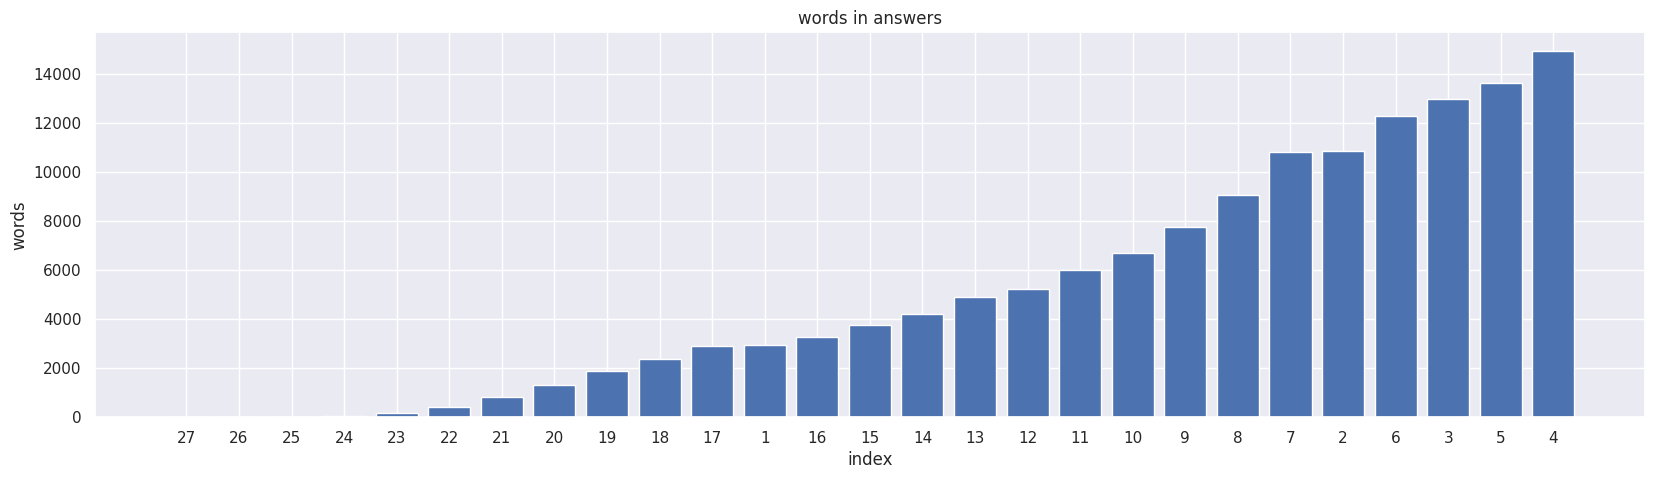

In [18]:
answer_count = data['answer'].str.split().apply(len).value_counts()
word_dict = dict(answer_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('words')
plt.xlabel('index')
plt.title('words in answers')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [21]:
# Minimum no. of words required
for i in range(0,101,10):
    print(i,np.percentile(q_lengths, i))
print("="*80)
for i in range(90,101):
    print(i,np.percentile(q_lengths, i))
print("="*80)
for i in [99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100]:
    print(i,np.percentile(q_lengths, i))

0 1.0
10 3.0
20 4.0
30 5.0
40 6.0
50 7.0
60 8.0
70 10.0
80 12.0
90 15.0
100 27.0
90 15.0
91 15.0
92 16.0
93 16.0
94 17.0
95 17.0
96 18.0
97 19.0
98 19.0
99 20.0
100 27.0
99.1 21.0
99.2 21.0
99.3 21.0
99.4 21.0
99.5 21.0
99.6 22.0
99.7 22.0
99.8 22.0
99.9 23.0
100 27.0


## encoder decoder
Adding <start>, <end> tokens, for to apply one time-shifted technique!


In [22]:
data['answer_in'] = '<start> ' + data['answer'].astype(str)
data['answer_out'] = data['answer'].astype(str) + ' <end>'
data.head()

,question,answer,answer_in,answer_out
0,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,<start> not the hacking and gagging and spitti...,not the hacking and gagging and spitting part ...
1,not the hacking and gagging and spitting part ...,okay then how bout we try out some french cuis...,<start> okay then how bout we try out some fre...,okay then how bout we try out some french cuis...
2,you are asking me out that is so cute what is...,forget it,<start> forget it,forget it <end>
3,no no it is my fault we did not have a proper...,cameron,<start> cameron,cameron <end>
4,gosh if only we could find kat a boyfriend,let me see what i can do,<start> let me see what i can do,let me see what i can do <end>


In [23]:
data_final = data.drop(['answer'], axis=1)
data_final.head()

,question,answer_in,answer_out
0,well i thought we would start with pronunciati...,<start> not the hacking and gagging and spitti...,not the hacking and gagging and spitting part ...
1,not the hacking and gagging and spitting part ...,<start> okay then how bout we try out some fre...,okay then how bout we try out some french cuis...
2,you are asking me out that is so cute what is...,<start> forget it,forget it <end>
3,no no it is my fault we did not have a proper...,<start> cameron,cameron <end>
4,gosh if only we could find kat a boyfriend,<start> let me see what i can do,let me see what i can do <end>


### Train test split of the dataset


In [24]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_final, test_size=0.3)

Adding <end> in Answer_in so that it can be tokenized by tokenizer!


In [25]:
train.iloc[0]['answer_in']= str(train.iloc[0]['answer_in'])+' <end>'
train.iloc[0]['answer_out']= str(train.iloc[0]['answer_out'])+' <end>'

In [26]:
data.head()

,question,answer,answer_in,answer_out
0,well i thought we would start with pronunciati...,not the hacking and gagging and spitting part ...,<start> not the hacking and gagging and spitti...,not the hacking and gagging and spitting part ...
1,not the hacking and gagging and spitting part ...,okay then how bout we try out some french cuis...,<start> okay then how bout we try out some fre...,okay then how bout we try out some french cuis...
2,you are asking me out that is so cute what is...,forget it,<start> forget it,forget it <end>
3,no no it is my fault we did not have a proper...,cameron,<start> cameron,cameron <end>
4,gosh if only we could find kat a boyfriend,let me see what i can do,<start> let me see what i can do,let me see what i can do <end>


In [27]:
# drop the answer_in and answer_out
train = train.drop(['answer_in', 'answer_out'], axis=1)
validation = validation.drop(['answer_in', 'answer_out'], axis=1)

In [29]:
# save the new train and validation data
train.to_csv('train.csv', index=False)
validation.to_csv('validation.csv', index=False)